In [76]:
import keras
import tensorflow as tf
import numpy as np

In [77]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [78]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [79]:
import matplotlib.pyplot as plt

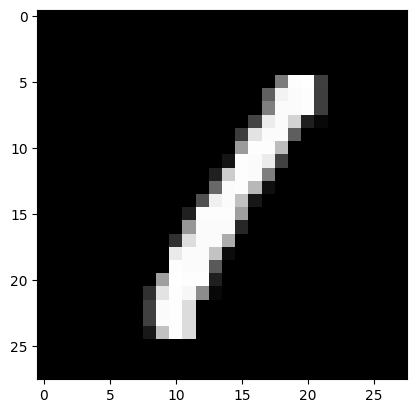

In [80]:
plt.figure()
plt.imshow(X_train[3], cmap="gray")
plt.show()

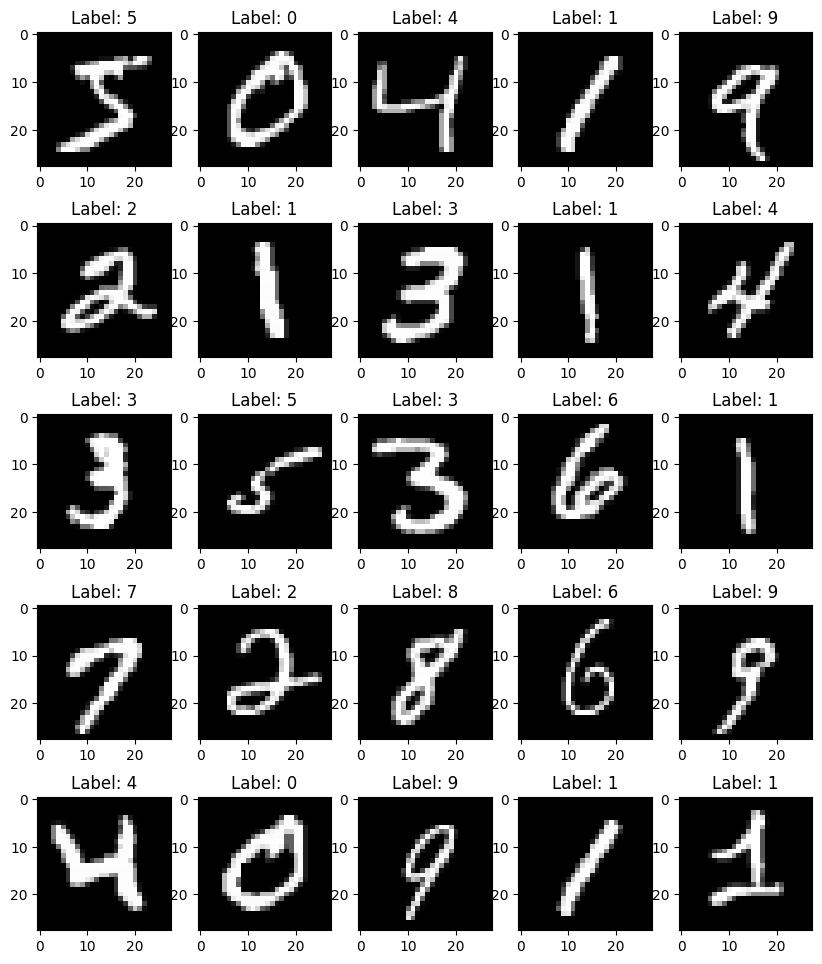

In [81]:
axs, figs = plt.subplots(5, 5, figsize=(10,12))
cp=0
for i in range(5):
    for j in range(5):
        figs[i,j].imshow(X_train[cp], cmap='gray')
        figs[i,j].set_title("Label: {}".format(y_train[cp]))
        cp += 1

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Initialiser le modèle séquentiel
model = Sequential()


In [83]:
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [84]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.3, verbose=1)

predictions = model.predict(X_test)

Epoch 1/20


c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1313/1313 [==============================] - 3s 2ms/step - loss: 1.8167 - accuracy: 0.8168 - val_loss: 0.5175 - val_accuracy: 0.8679
Epoch 2/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.9049 - val_loss: 0.2986 - val_accuracy: 0.9317
Epoch 3/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2464 - accuracy: 0.9326 - val_loss: 0.2523 - val_accuracy: 0.9358
Epoch 4/20
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1933 - accuracy: 0.9474 - val_loss: 0.2244 - val_accuracy: 0.9421
Epoch 5/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1693 - accuracy: 0.9533 - val_loss: 0.2148 - val_accuracy: 0.9459
Epoch 6/20
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1460 - accuracy: 0.9597 - val_loss: 0.1822 - val_accuracy: 0.9529
Epoch 7/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1291 - accuracy: 0.9660 - val_loss: 0.2145 - val_accuracy: 0.9501
Epo

In [85]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1859 - accuracy: 0.9657 - 287ms/epoch - 916us/step

Test accuracy: 0.9656999707221985


In [86]:
class_names = [str(i) for i in range(10)]

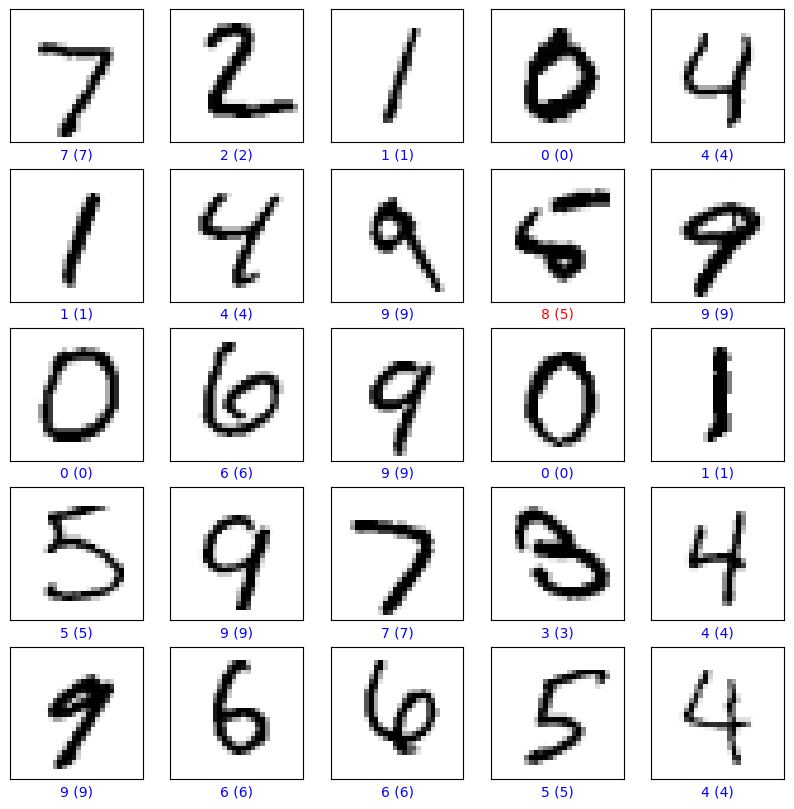

In [91]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.show()

In [94]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

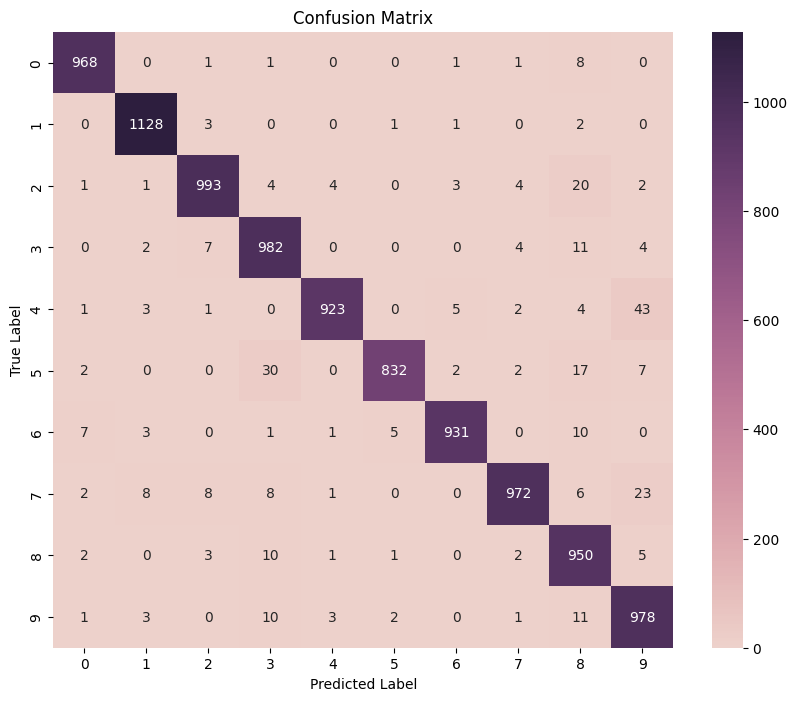

In [105]:

y_pred = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [119]:
model2 = keras.Sequential([
    keras.layers.Conv2D(128,2,2,input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,2,2,activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [121]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history2 = model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.3, verbose=1)

predictions2 = model2.predict(X_test)

Epoch 1/10
657/657 [==============================] - 5s 6ms/step - loss: 0.0796 - accuracy: 0.9764 - val_loss: 0.1268 - val_accuracy: 0.9683
Epoch 2/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0599 - accuracy: 0.9818 - val_loss: 0.1482 - val_accuracy: 0.9651
Epoch 3/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0572 - accuracy: 0.9813 - val_loss: 0.1532 - val_accuracy: 0.9636
Epoch 4/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0515 - accuracy: 0.9833 - val_loss: 0.1329 - val_accuracy: 0.9703
Epoch 5/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0425 - accuracy: 0.9861 - val_loss: 0.1725 - val_accuracy: 0.9640
Epoch 6/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.1562 - val_accuracy: 0.9708
Epoch 7/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.1623 - val_accuracy: 0.9674
Epoch 

In [122]:
test_loss2, test_acc2 = model2.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc2)

313/313 - 1s - loss: 0.1616 - accuracy: 0.9710 - 557ms/epoch - 2ms/step

Test accuracy: 0.9710000157356262


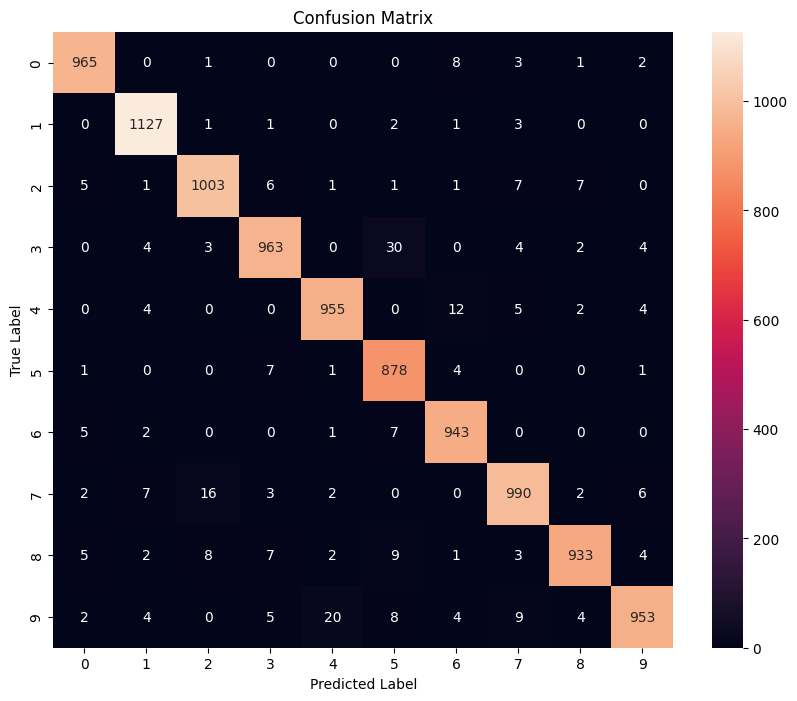

In [123]:

y_pred2 = np.argmax(predictions2, axis=1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [124]:
model2.save('cnn_model.keras')

In [117]:
model.save('dnn_model.keras')